# 图像基础库

In [ ]:
import cv2

In [14]:
!pip install opencv-python

In [1]:
from PIL import ImageColor
ImageColor.getcolor('red', 'RGBA')

(255, 0, 0, 255)

In [3]:
help(pic)

Help on JpegImageFile in module PIL.JpegImagePlugin object:

class JpegImageFile(PIL.ImageFile.ImageFile)
 |  JpegImageFile(fp=None, filename=None)
 |  
 |  Base class for image file format handlers.
 |  
 |  Method resolution order:
 |      JpegImageFile
 |      PIL.ImageFile.ImageFile
 |      PIL.Image.Image
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  draft(self, mode, size)
 |      Configures the image file loader so it returns a version of the
 |      image that as closely as possible matches the given mode and
 |      size. For example, you can use this method to convert a color
 |      JPEG to greyscale while loading it.
 |      
 |      If any changes are made, returns a tuple with the chosen ``mode`` and
 |      ``box`` with coordinates of the original image within the altered one.
 |      
 |      Note that this method modifies the :py:class:`~PIL.Image.Image` object
 |      in place. If the image has already been loaded, this method has no
 |      effect.


In [4]:
from PIL import Image
pic = Image.open("./pic/py.jfif")


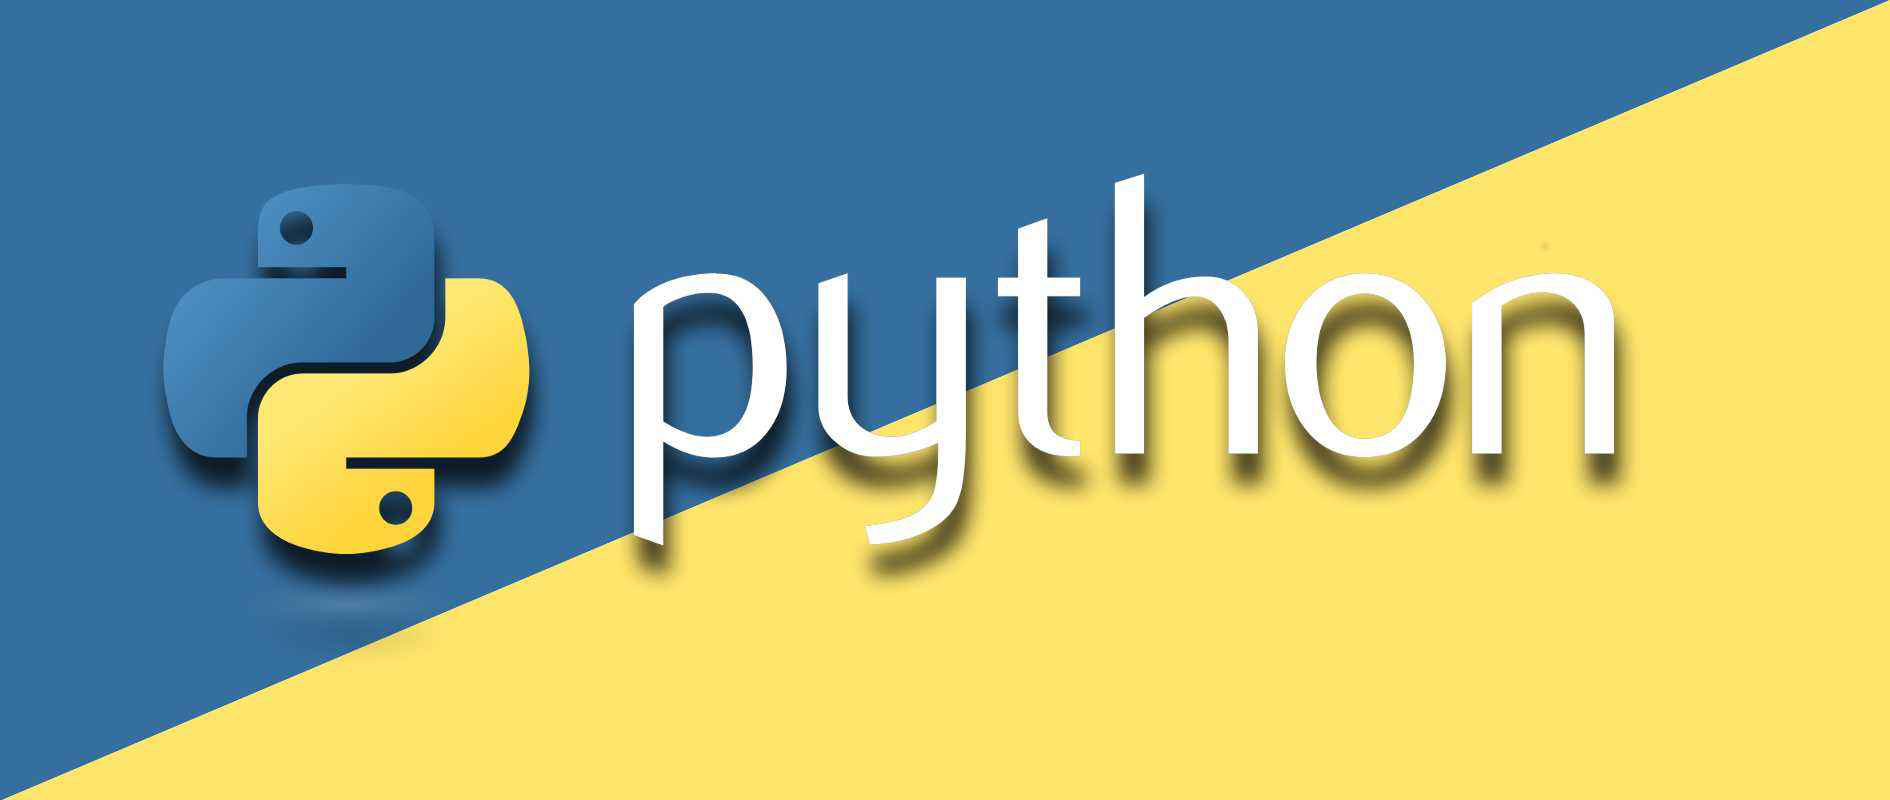

In [5]:
pic

In [7]:
help(pic)

Help on JpegImageFile in module PIL.JpegImagePlugin object:

class JpegImageFile(PIL.ImageFile.ImageFile)
 |  JpegImageFile(fp=None, filename=None)
 |  
 |  Base class for image file format handlers.
 |  
 |  Method resolution order:
 |      JpegImageFile
 |      PIL.ImageFile.ImageFile
 |      PIL.Image.Image
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  draft(self, mode, size)
 |      Configures the image file loader so it returns a version of the
 |      image that as closely as possible matches the given mode and
 |      size. For example, you can use this method to convert a color
 |      JPEG to greyscale while loading it.
 |      
 |      If any changes are made, returns a tuple with the chosen ``mode`` and
 |      ``box`` with coordinates of the original image within the altered one.
 |      
 |      Note that this method modifies the :py:class:`~PIL.Image.Image` object
 |      in place. If the image has already been loaded, this method has no
 |      effect.


In [4]:
width, height = pic.size
pic.size

(1890, 800)

In [5]:
pic.format 

'JPEG'

补充一些图片格式的知识 https://baike.baidu.com/item/%E5%9B%BE%E7%89%87%E6%A0%BC%E5%BC%8F/381122?fr=aladdin

In [6]:
pic.save('./pic/py.png')  #打开时候没有透明通道 所以存回去也没有透明通道 不能凭空捏造

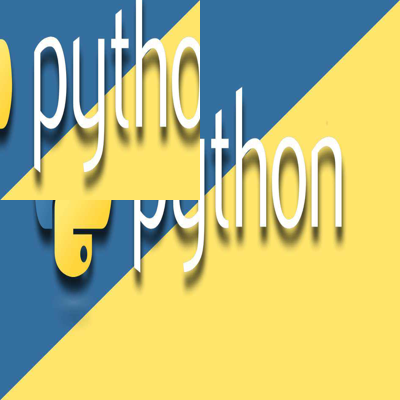

In [7]:
back = pic.copy().resize((400,400))

tmp = back.crop((100,100,300,300))
back.paste(tmp,(0,0))

back

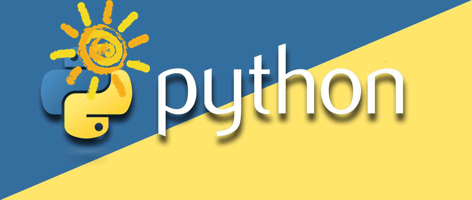

In [8]:
width, height = pic.size
back = pic.copy().resize((int(width/4),int(height/4)))

tmp = Image.open('./pic/武侠.png')
tmp = tmp.resize((100,100))  # resize 返回一个新的 赋值回去
back.paste(tmp,(50,0),tmp)   # 要想粘贴透明通道 必须再把图片传到第三个参数 

back

In [9]:
back.save('./pic/pyres.jpg')

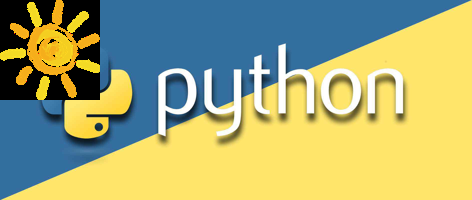

In [10]:
width, height = pic.size
back = pic.copy().resize((int(width/4),int(height/4)))

tmp = Image.open('./pic/武侠.png')
tmp = tmp.resize((100,100))  # resize 返回一个新的 赋值回去
back.paste(tmp,(0,0))   # 要想粘贴透明通道 必须再把图片传到第三个参数 

back

# 图片处理

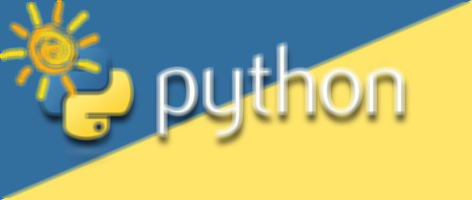

In [11]:
from PIL import ImageFilter, Image
im = Image.open('./pic/pyres.jpg')
im_blur = im.filter(ImageFilter.BLUR)
im_blur

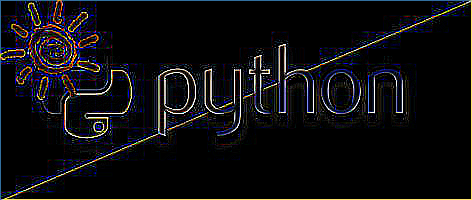

In [12]:
from PIL import ImageFilter, Image
im = Image.open('./pic/pyres.jpg')
im_blur = im.filter(ImageFilter.FIND_EDGES)
im_blur

# 类型转换和numpy

* opencv的图片imread进来更接近于一个np的array 但是通道是bgr 而不是rgb 
    1. 可以直接把opencv的mat对象当成array来用 问题不大
* pillow的图片open进来是自己的一个对象 
    1. 需要通过np.asarray变成np的array  
    2. 需要通过Image.fromarray 从array转回pillow对象
    
    
array就是个中介


opencv -> pillow

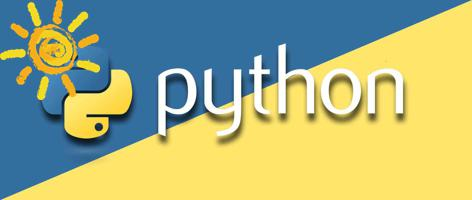

In [13]:
import cv2  
from PIL import Image
img = cv2.imread("./pic/pyres.jpg")
image = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))  
image

pillow -> opencv

In [10]:
import cv2  
from PIL import Image 
import numpy as np
image = Image.open("./pic/pyres.jpg")  
img = cv2.cvtColor(np.asarray(image),cv2.COLOR_RGB2BGR)
cv2.imshow('frame', img)
cv2.waitKey (0)
cv2.destroyAllWindows()

# 摄像头捕获

In [3]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0) # 注意这里视频放在当前工作目录下，VideoCapture的参数就是视频文件名

while(cap.isOpened()): # isOpened方法判断视频是否成功打开
    ret, frame = cap.read() # read方法返回一个表示视频是否正确读取的布尔值和一帧图像

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 这里用cvtColor（cvt就是convert的缩写）方法进行色彩空间的转换，这里是从BGR空间转换到灰度空间
    
    edges = cv2.Canny(gray, 30, 70) # 边缘检测算子
    res = np.hstack((gray, edges)) # 边缘检测的结果和原结果水平拼接
    cv2.imshow('frame', res) # 通过imshow显示一帧图像
    if cv2.waitKey(1) & 0xFF == ord('q'): # 一帧显示一毫秒，通过上面的while循环不断地显示下一帧，从而形成动态的视频；按q键退出循环，关闭视频。
        break

cap.release()
cv2.destroyAllWindows()

# 字符画

## 转灰度

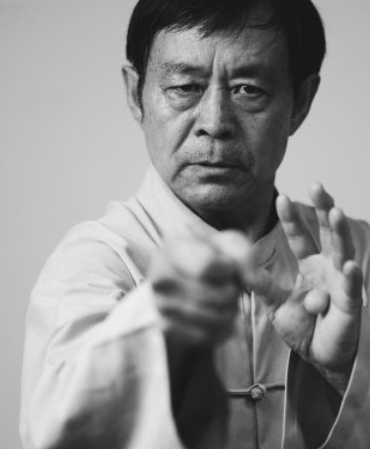

In [1]:
from PIL import Image
pic = Image.open("./pic/1000.png")
gray = pic.convert('L')
gray

如何拿到指定像素

In [18]:
gray.getpixel((300,300))

103

In [2]:
from PIL import Image

pic = Image.open("./pic/1000.png")
gray = pic.convert('L')
w,h = gray.size

show_heigth = 50             
show_width = 100
ascii_char = '@%#*+=-'

for i in range(show_heigth):
    y = int(i * h / show_heigth)
    text = ""
    for j in range(show_width):
        x = int(j * w / show_width)
        text += ascii_char[int(gray.getpixel((x,y))/255 * len(ascii_char))]
    print(text)

++++++++++++++++++++++================@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#+++++++++++++++
+++++++++++++++++++++===============+@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@%%@@@@@@@@@@@@@@++++++++++++++
++++++++++++++++===================+@@@@@@@@@@@@%@%%@@@@%%@@@@@@@@%@%%%%%@@@@@@@@@@@@@@*++=====+++++
+++++++++++++======================%@@@@@@@@@%##%%*#%**#%%@@@@%%%%%%@@@@%@%@@@@@@@@@@@@@++==========
++++++++=+========================+@@@@@@@#+++++=====++#%##########%##%%%%%%%@@@@@@@@@@@+===========
++++++============================+@@@@@@%*+++========+++++++*****#####%%%%%%%@@@@@@@@@@#===========
+++++=============================+@@@@@%*++++=========+++*+++++*****#%%%%%%%@@@@@@@@@@@#===========
+==================================*%@@%#*+*+**+++++++++**=++++****###%%%%%%%%@@@@@@@@@#============
+================================*#+*#@%***++***##%%%%%##%+*#%*%%@@@@%%%%%%%%%@@@@@@@@%=============
==================================*+**@%+++**++=+=+*#####*+#%%#*++++*#%%%@@%%%%@@@@%%@@====

# 扩展

扩展  
像素画 首先弄一个图片集例如二十张 把每一张图片都做成灰度图统计总亮度之后排序  
排序之后用不同亮度的图片做成马赛克 模拟字符画的样子来绘图

扩展  
马赛克的去除 有一个算法叫做inpaint ai实现的修补和想象  
deepfake是违法的么  

扩展  
能否直接把摄像头数据读下来 人像分割之后用字符画播放呢？能做到多少fps？  
摄像头拍摄视频里面 有倾斜的ppt 能否经过边缘识别和变换拉平到正常视角呢？  
https://www.jb51.net/article/164348.htm 示例代码  
能否做一个人像实时定位更换背景的程序 opencv来实现 用网络的api速度太慢了来不及  